# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Draw-idealized-graphs" data-toc-modified-id="Draw-idealized-graphs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Draw idealized graphs</a></div>

# Draw idealized graphs
First import required packages and set meta-information.

In [151]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np
import matplotlib as mpl
import math
%matplotlib inline  
plt.style.use('ggplot') # print(plt.style.available)

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
size_title = 16
size_axis_label = 12

n = 6
path = '/Users/graebnerc/Documents/GitHub/networks/03_first_revision/network-figures'

Then define a function for making the figure.

In [145]:
def draw_graph(edge_list, node_list, name, layout="fruchtermann"):
    """
    Draws a graph and saves it.
    
    Parameters
    -----------
    edge_list: list
        List object containing all edges of the graph.
    
    node_list: list
        List object containing all the nodes of the graph.
    
    name: str
        Name of the graph. Used for title and output file.
        
    layout: str (opt, default: fruchtermann)
        Specifies the layout for the graph. There are two options:
        'fruchtermann' calls the Fruchtermann-Reingold layout, a good default option.
        'circular' call the circular layout, a good option for cycle graphs or small-world networks.
    """
    g = nx.Graph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    degree_sequence=sorted([d for n,d in g.degree_iter()], reverse=True)
    degreeCount=collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    plt.clf()
    f, ax = plt.subplots(1, 2, figsize=(11.84, 4.15))
    if layout == "fruchtermann":
        pos = nx.fruchterman_reingold_layout(g)
    elif layout == "circular":
        pos = nx.circular_layout(g)
    else:
        print("There are only two layout options: fruchtermann or circular, but not {}.".format(layout))
    
    nx.draw(g, pos,  node_color='#3F5D7D', node_size=80, edge_color='k', with_labels=False, ax=ax[0])
    graphname = "A " + name + " network"
    ax[0].set_title(graphname, fontsize=size_title, ha='left', loc='left')

    hist, bins = np.histogram(degree_sequence)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    x_axis_max = max(10, max(degree_sequence))
    y_axis_max = math.ceil(1.1 * max(cnt) + 2)
    ax[1].set_title("The corresponding degree distribution", fontsize=size_title, ha='left', loc='left')
    ax[1].bar(deg, cnt, color="#3F5D7D", alpha=1.0, edgecolor = "#3F5D7D")
    ax[1].set_xlim(0, x_axis_max)
    ax[1].set_ylim(0, y_axis_max)
    ax[1].set_yticks(range(0,y_axis_max))
    ax[1].set_xticks([d+0.4 for d in range(0,x_axis_max)])
    ax[1].set_xticklabels([d for d in range(0,x_axis_max)])
    ax[1].set_xlabel("Degree", fontsize=size_axis_label)  
    ax[1].set_ylabel("Frequency", fontsize=size_axis_label)  
    ax[1].spines["top"].set_visible(False)  
    ax[1].spines["right"].set_visible(False)
    figname = name + ".pdf"

    plt.savefig(figname, bbox_inches="tight")

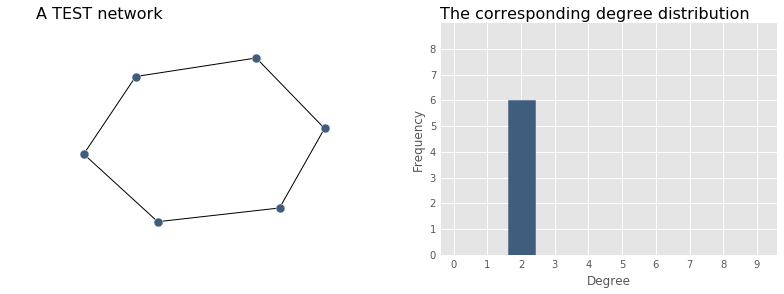

In [146]:
gg = nx.cycle_graph(n)
edges = gg.edges()
nodes = gg.nodes()

draw_graph(edges, nodes, "cycle")

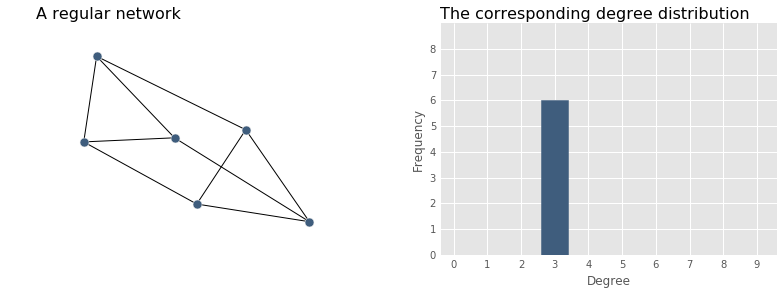

In [147]:
plt.style.use('ggplot')
gg = nx.random_regular_graph(3, n)
edges = gg.edges()
nodes = gg.nodes()

draw_graph(edges, nodes, "regular")

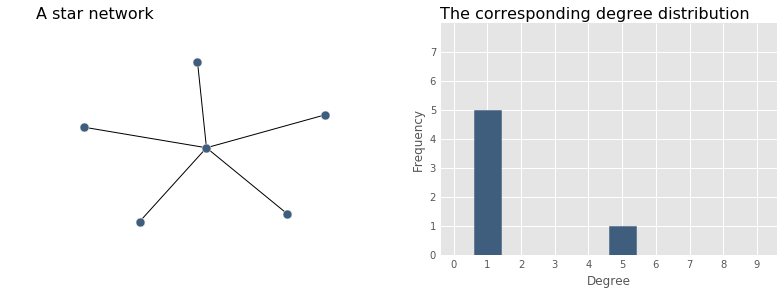

In [148]:
plt.style.use('ggplot')
gg = nx.nx.star_graph(n-1)
edges = gg.edges()
nodes = gg.nodes()

draw_graph(edges, nodes, "star")

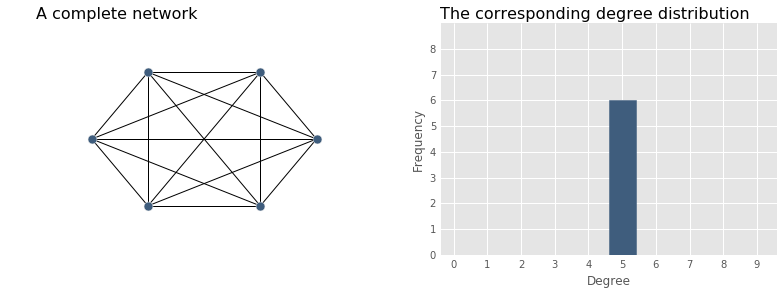

In [150]:
plt.style.use('ggplot')
gg = nx.nx.complete_graph(n)
edges = gg.edges()
nodes = gg.nodes()

draw_graph(edges, nodes, "complete", layout="circular")

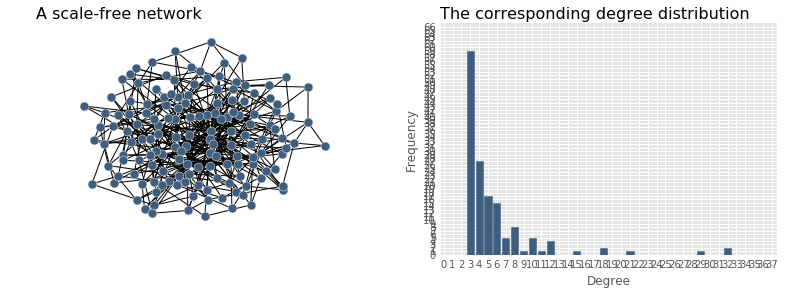

In [154]:
plt.style.use('ggplot')
gg = nx.powerlaw_cluster_graph(150, 3, 0.1)
edges = gg.edges()
nodes = gg.nodes()

draw_graph(edges, nodes, "scale-free")

[1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4]


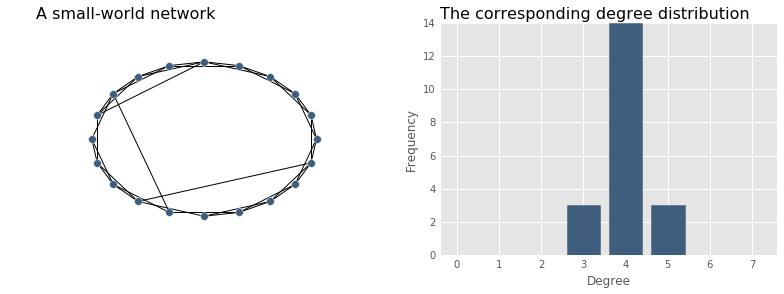

In [131]:
gg = nx.nx.connected_watts_strogatz_graph(20,4,0.2)
edges = gg.edges()
nodes = gg.nodes()

draw_graph(edges, nodes, "small_world", layout="circular")

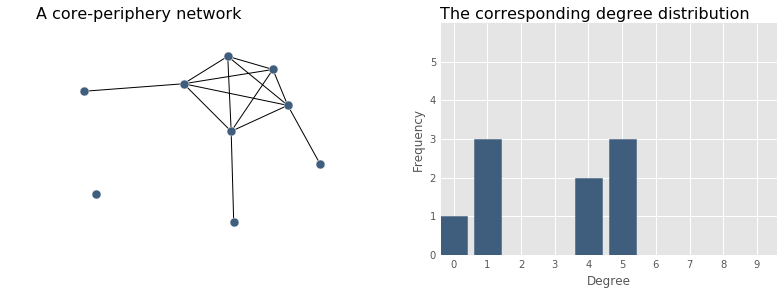

In [153]:
gg = nx.connected_watts_strogatz_graph(5,4,0.0)

gg.add_nodes_from([5,6,7,8])
gg.add_edges_from([(5,1),(6,2),(7,4)])

edges = gg.edges()
nodes = gg.nodes()

draw_graph(edges, nodes, "core-periphery")